In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

In [33]:
from my_func_module.func_for_corr import *

In [34]:
def predict_value(corr_matrix, known_values, corr_with_unknown):
    """
    Определение значения в неизвестной точке на основе корреляционной матрицы и значений в известных точках.

    Parameters:
    corr_matrix (numpy.ndarray): Корреляционная матрица (n x n) для известных точек.
    known_values (numpy.ndarray): Вектор значений в известных точках (n).
    corr_with_unknown (numpy.ndarray): Вектор корреляций между известными точками и неизвестной точкой (n).

    Returns:
    float: Предсказанное значение в неизвестной точке.
    """
    # Решаем систему R * λ = r для нахождения вектора весов λ
    lambdas = np.linalg.solve(corr_matrix, corr_with_unknown)

    # Вычисляем значение в неизвестной точке как линейную комбинацию известных значений
    predicted_value = np.dot(lambdas, known_values)

    return predicted_value

# Пример данных
corr_matrix = np.array([
    [1.0, 0.8, 0.5],
    [0.8, 1.0, 0.3],
    [0.5, 0.3, 1.0]
])

known_values = np.array([3.0, 2.5, 4.0])  # Значения в известных точках
corr_with_unknown = np.array([0.7, 0.6, 0.4])  # Корреляция между известными точками и неизвестной

# Предсказание значения в неизвестной точке
predicted_value = predict_value(corr_matrix, known_values, corr_with_unknown)
print(f"Предсказанное значение в неизвестной точке: {predicted_value}")

Предсказанное значение в неизвестной точке: 2.3249999999999997


# Разбивка данных

In [35]:
"""
Чтение информации о скважинах
"""
df_boreholes = df_boreholes = pd.read_excel(f"data/координаты_скважин.xlsx")
house_3 = pd.read_excel("data/house_3_local.xlsx")

all_E = pd.DataFrame(columns=["borehole", "x", "y", "z", "h", "E"])

for borehole in house_3["тсз"]:
    """
    Запись данных по скважинам в один датафрейм
    """
    borehole_info = house_3[house_3["тсз"]==borehole]
    df_now = pd.read_excel(f"data/тсз{borehole}.xlsx")
    df_now = get_filter_df(df_now, "E").loc[:, ["h", "E"]]
    
    df_now["borehole"] = borehole 
    df_now["x"] = borehole_info["x"].iloc[0]
    df_now["y"] = borehole_info["y"].iloc[0]
    df_now["z"] = borehole_info["z"].iloc[0]

    all_E = pd.concat([all_E, df_now], ignore_index=True)

all_E["z_h"] = all_E["z"] - all_E["h"]
print(all_E.head(), all_E.shape)

"""
Деление без остатка абсолютной отметки на 1 и запись значение в 'group'
группировка и вычисление средних значений
"""
all_E["group"] = all_E["z_h"]//1
group_E = all_E.groupby(by=["group", "borehole"]).mean()
group_E["group"] = [int(x[0]) for x in group_E.index]
group_E["borehole"] = [int(x[1]) for x in group_E.index]

C:\Users\lix96\AppData\Local\Temp\ipykernel_13820\516161752.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_E = pd.concat([all_E, df_now], ignore_index=True)


  borehole             x            y       z     h    E     z_h
0       51  97607.570697  4338.997129  76.631  0.00  0.0  76.631
1       51  97607.570697  4338.997129  76.631  0.05  6.0  76.581
2       51  97607.570697  4338.997129  76.631  0.10  6.0  76.531
3       51  97607.570697  4338.997129  76.631  0.15  6.0  76.481
4       51  97607.570697  4338.997129  76.631  0.20  6.0  76.431 (24429, 7)


In [36]:
"""
Случайная разбивка данных
"""
df_now = group_E.query('group == 65')

p = df_now.loc[:, ["x", "y"]].to_numpy() # Выборка для модели регрессии
x = df_now.loc[:, ["x", "y"]].to_numpy() # Выборка для кригинга
target = df_now["E"].to_numpy() # Известные значения

p_train, p_test, x_train, x_test, target_train, target_test = train_test_split(
    p, x, target, test_size=0.3, random_state=123
)

# Расчеты

In [43]:
x_train

array([[97546.68443701,  4340.93947698],
       [97594.87357501,  4429.65846098],
       [97528.48212001,  4375.98916598],
       [97543.80515101,  4340.61596198],
       [97530.76455301,  4419.38243398],
       [97570.67634601,  4403.26256098],
       [97527.95544001,  4352.23663398],
       [97549.64799001,  4393.84903398],
       [97598.76120001,  4373.04023998],
       [97589.09130301,  4362.39957298],
       [97533.21933901,  4340.96620598],
       [97566.97086301,  4351.33440498],
       [97607.29524601,  4350.54613298],
       [97541.03504401,  4430.97643498],
       [97598.60321701,  4362.18466898],
       [97529.23081801,  4386.81451098],
       [97600.37871601,  4391.85240098],
       [97560.07663201,  4403.50471098],
       [97600.29877801,  4418.17577398],
       [97591.54559701,  4429.17091098],
       [97557.11436301,  4340.41823198],
       [97611.06469501,  4402.80373598],
       [97540.72685701,  4420.10598698],
       [97573.72175701,  4374.14913598],
       [97571.59

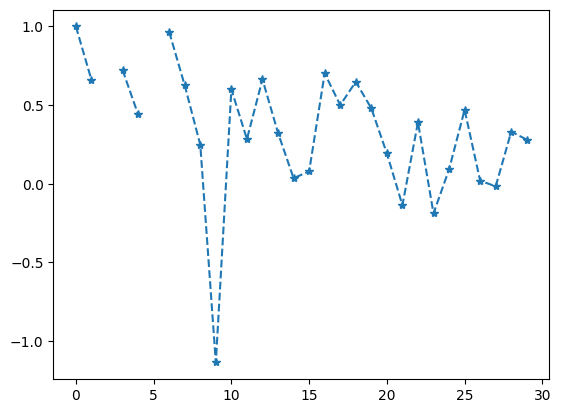

[ 1.          0.66027306         nan  0.72340661  0.44120954         nan
  0.96556046  0.62541093  0.24767732 -1.1369006   0.60013988  0.28386237
  0.66370386  0.32300828  0.03522545  0.0779001   0.70124228  0.50005883
  0.64823745  0.47962742  0.19242501 -0.1369095   0.39101472 -0.18896912
  0.09086015  0.4697846   0.01895301 -0.01659091  0.33153734  0.28011032]


In [51]:
clay_border = [73.5, 65]
scale_x = 1
corr_size = 30 * scale_x

show_plot_flag = False
corr_normal = True

x_plot, y_plot = get_corr(x_train*scale_x, target_train, corr_size, normal=corr_normal)
    
"""
Запись коэф. корр. в матрицу
"""
#plt.plot(x_plot1, y_plot)
plt.plot(x_plot, y_plot, "--*")
plt.show()
print(y_plot)

In [9]:
# Пример данных
corr_matrix = np.array([
    [1.0, 0.8, 0.5],
    [0.8, 1.0, 0.3],
    [0.5, 0.3, 1.0]
])

known_values = np.array([3.0, 2.5, 4.0])  # Значения в известных точках
corr_with_unknown = np.array([0.7, 0.6, 0.4])  # Корреляция между известными точками и неизвестной

# Предсказание значения в неизвестной точке
predicted_value = predict_value(corr_matrix, known_values, corr_with_unknown)
print(f"Предсказанное значение в неизвестной точке: {predicted_value}")

Предсказанное значение в неизвестной точке: 2.3249999999999997


In [23]:
np.concatenate([x_train, target_train.reshape(-1, 1)], axis=1)

array([[9.75466844e+04, 4.34093948e+03, 7.46000000e+00],
       [9.75948736e+04, 4.42965846e+03, 7.35500000e+00],
       [9.75284821e+04, 4.37598917e+03, 7.52000000e+00],
       [9.75438052e+04, 4.34061596e+03, 7.90500000e+00],
       [9.75307646e+04, 4.41938243e+03, 6.95000000e+00],
       [9.75706763e+04, 4.40326256e+03, 1.38950000e+01],
       [9.75279554e+04, 4.35223663e+03, 8.21500000e+00],
       [9.75496480e+04, 4.39384903e+03, 1.30526316e+01],
       [9.75987612e+04, 4.37304024e+03, 9.61500000e+00],
       [9.75890913e+04, 4.36239957e+03, 1.06900000e+01],
       [9.75332193e+04, 4.34096621e+03, 6.93000000e+00],
       [9.75669709e+04, 4.35133440e+03, 7.89500000e+00],
       [9.76072952e+04, 4.35054613e+03, 1.51666667e+01],
       [9.75410350e+04, 4.43097643e+03, 7.67500000e+00],
       [9.75986032e+04, 4.36218467e+03, 8.93500000e+00],
       [9.75292308e+04, 4.38681451e+03, 7.04000000e+00],
       [9.76003787e+04, 4.39185240e+03, 1.17500000e+01],
       [9.75600766e+04, 4.40350

In [30]:
import numpy as np
import pandas as pd

# Функция для расчета весовой функции, основанной на координатах x и y
def weight_function(x1, y1, x2, y2, sigma):
    distance_sq = (x1 - x2)**2 + (y1 - y2)**2
    return np.exp(-distance_sq / (2 * sigma**2))

# Функция для вычисления корреляционной функции с учетом весов
def weighted_correlation(data, sigma):
    n = len(data)  # количество точек
    R = np.zeros((n, n))  # матрица корреляционной функции
    
    # Рассчитываем взвешенную корреляцию для каждой пары точек
    for i in range(n):
        for j in range(i, n):
            # Координаты и значения для пары точек i и j
            x1, y1, h1 = data.iloc[i][['x', 'y', 'h']]
            x2, y2, h2 = data.iloc[j][['x', 'y', 'h']]
            
            # Вычисляем вес на основе расстояния между точками
            weight = weight_function(x1, y1, x2, y2, sigma)
            
            # Корреляция по взвешенным значениям
            R[i, j] = weight * (h1 - data['h'].mean()) * (h2 - data['h'].mean())
            R[j, i] = R[i, j]  # матрица симметрична
    
    # Нормализация корреляции
    norm_factor = np.sqrt(np.sum((data['h'] - data['h'].mean())**2))
    if norm_factor > 0:
        R /= norm_factor**2
    
    return R

# Пример данных: координаты (x, y) и значения h
data = pd.DataFrame(np.concatenate([x_train, target_train.reshape(-1, 1)], axis=1),
                    columns=["x", "y", "h"]# случайные значения h
                   )

sigma = 1.0  # параметр весовой функции

# Вычисляем взвешенную корреляционную матрицу
correlation_matrix = weighted_correlation(data, sigma)

# Выводим результат
print("Корреляционная матрица:")
print(correlation_matrix)

Корреляционная матрица:
[[ 1.29801438e-002  0.00000000e+000  0.00000000e+000 ... -0.00000000e+000
   1.90469724e-062  1.15061167e-256]
 [ 0.00000000e+000  1.40307786e-002  0.00000000e+000 ... -6.13102532e-013
   0.00000000e+000  0.00000000e+000]
 [ 0.00000000e+000  0.00000000e+000  1.23981361e-002 ... -0.00000000e+000
   8.30532608e-262  1.32095221e-025]
 ...
 [-0.00000000e+000 -6.13102532e-013 -0.00000000e+000 ...  7.72042341e-005
  -0.00000000e+000 -0.00000000e+000]
 [ 1.90469724e-062  0.00000000e+000  8.30532608e-262 ... -0.00000000e+000
   8.77835745e-003  1.34886796e-250]
 [ 1.15061167e-256  0.00000000e+000  1.32095221e-025 ... -0.00000000e+000
   1.34886796e-250  1.73144708e-002]]
